# Selection of "normal" surface flux year from Tamura and eraInterim datasets
The aim is select a suitable year that represents present day surface forcing for CABROMS. To do so, plot the monthly averages of Tamura sea ice-ocean heat and salt fluxes for all provided years (1992-2007) on top of each other.
Subsequently do the same for wind stress from era interim and  determine a year which does not stand out based on both comparisons . Select the same year. You can't simply use a climatology, since this would kill the high frequency signal in the forcing.

## Tamuras surface heat and salt fluxes
Loading the data (already monthly averages from year 1992-2007 preprocessed from raw data with matlab script read_tamura_daily_to_monthly.m) and explore it.

In [5]:
import os
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

tamura_data_path = os.path.join(os.pardir,'data','external','tamura','1992-2007_Takeshi_subset_monthly.mat')
tamura_raw = sio.loadmat(tamura_data_path)

In [6]:
for key,value in tamura_raw.items():
    print(key, type(value),np.shape(value))

__header__ <class 'bytes'> ()
__version__ <class 'str'> ()
__globals__ <class 'list'> (0,)
shfluxtmp <class 'numpy.ndarray'> (721, 721, 192)
ssfluxtmp <class 'numpy.ndarray'> (721, 721, 192)


Create Xarray dataset with datetime coordinate

In [55]:
time = pd.date_range('1992-01',periods=np.size(tamura_raw['shfluxtmp'],-1),freq='M')
time_range = pd.period_range('1992-01',periods=np.size(tamura_raw['shfluxtmp'],-1),freq='M')
time_stamp = pd.Timestamp('1992-01')
tamura_ds = xr.Dataset({'shflux':(['X','Y','time'],tamura_raw['shfluxtmp']),
                        'ssflux':(['X','Y','time'],tamura_raw['ssfluxtmp'])},
                    coords={'time':(('time'),time),
                            'time_range':(('time'),time_range),
                            'reference_time':time_stamp})

Make climatology from area averages and calculate monthly anomalies

In [71]:
climatology = tamura_ds.mean(('X','Y')).groupby('time.month').mean('time')
anomalies = tamura_ds.mean(('X','Y')).groupby('time.month') - climatology

To for easy plotting: transfer to pandas dataframe and reorder data to year (1992,1993,...,2007) over month of year (1,2,3,...,12)

In [72]:
anom_df = anomalies.to_dataframe()
anom_df['year'] = anom_df.index.year
anom_df['monthOfYear'] = anom_df.index.month
anom_df = anom_df.pivot(index='monthOfYear',columns='year')

Plot all years on top of each other

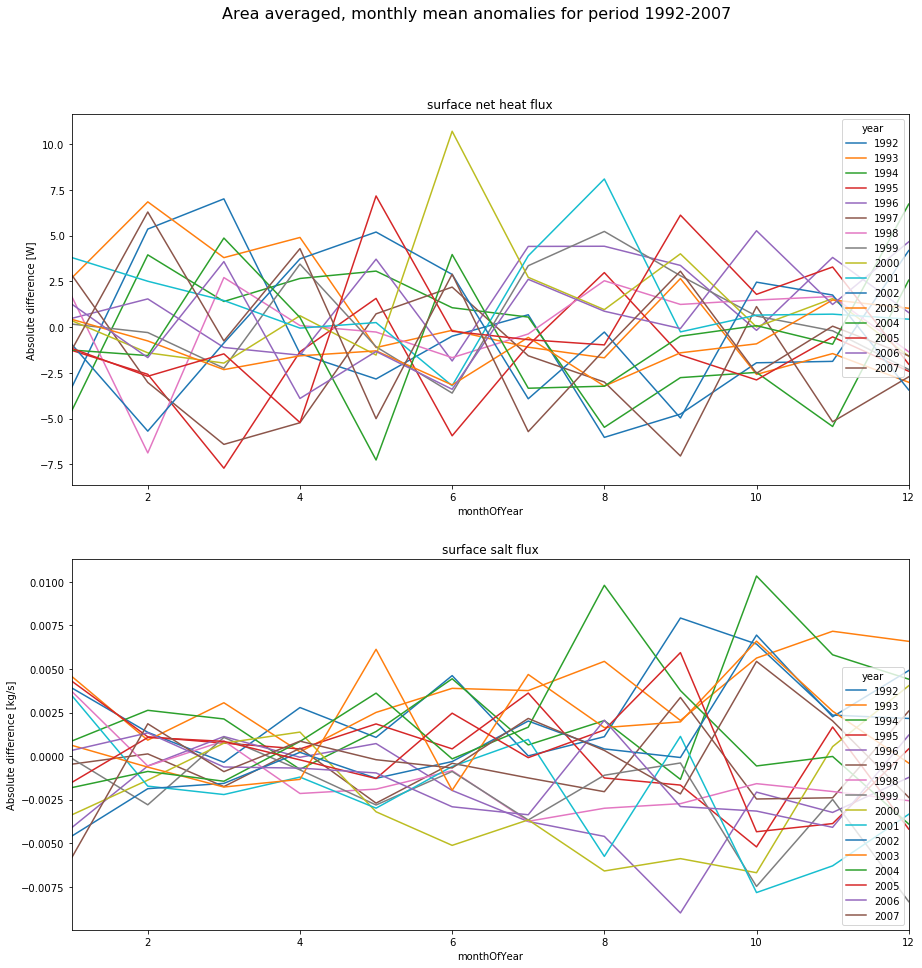

In [73]:
plt.clf()
fig,(ax1,ax2) = plt.subplots(2,figsize=(15,15))
plt.suptitle('Area averaged, monthly mean anomalies for period 1992-2007',fontsize=16)
anom_df['shflux'].plot(ax=ax1)
ax1.set_title('surface net heat flux')
ax1.set_ylabel('Absolute difference [W]')
anom_df['ssflux'].plot(ax=ax2)
ax2.set_title('surface salt flux')
ax2.set_ylabel('Absolute difference [kg/s]')

plt.show()

Display statistics of each year

In [74]:
anom_df['shflux'].describe()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,-0.452485,0.815891,-0.454262,-1.885630,1.490950,-2.270436,0.075032,0.491138,1.205903,1.525741,-0.336348,-1.020379,-0.156763,0.329947,0.761894,-0.120193
std,4.054180,3.229914,3.486106,2.878518,2.380474,3.377986,2.613736,2.706395,3.506216,2.816649,3.602602,1.493024,3.861515,3.630610,2.975176,3.638740
min,-6.024292,-3.013176,-5.474405,-7.708189,-1.848995,-7.041010,-6.872833,-3.604920,-1.962606,-3.203895,-5.684062,-3.222605,-7.260451,-5.211674,-3.896577,-5.710539
25%,-2.949615,-1.502262,-3.212816,-2.654276,-0.408828,-5.186204,-0.615721,-1.365257,-1.433206,0.174805,-3.550590,-1.756013,-1.971813,-1.600578,-1.412379,-1.804104
50%,-1.657441,-0.634086,0.806528,-1.433833,1.171557,-2.856835,0.665432,-0.015701,0.490212,0.685010,-0.566919,-1.104027,-0.712890,-0.827017,1.055278,-0.995414
75%,1.554525,2.963279,2.589737,-0.879565,3.739115,0.826853,1.677468,2.948112,1.852276,2.833489,2.564661,-0.312901,1.388655,2.166906,2.856891,2.933690
max,7.011322,6.848567,3.951306,2.982125,4.422055,2.856876,2.710004,5.231236,10.707149,8.097795,5.198455,1.485375,6.723765,7.170449,5.269601,6.295039


In [75]:
anom_df['ssflux'].describe()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.002783,0.003818,0.002719,0.000152,-0.002395,-0.000578,-0.001373,-0.002482,-0.002431,-0.002195,0.000589,0.001509,0.000909,0.000077,-0.001146,0.000044
std,0.002526,0.002173,0.003193,0.002839,0.002803,0.001964,0.002016,0.002874,0.003489,0.003305,0.003108,0.002993,0.003547,0.002753,0.002097,0.002830
min,-0.000357,0.000247,-0.001334,-0.005209,-0.008997,-0.002698,-0.003739,-0.008347,-0.006689,-0.007828,-0.004592,-0.001961,-0.003895,-0.004338,-0.004084,-0.005831
25%,0.001104,0.002392,0.000808,-0.001355,-0.003839,-0.002128,-0.002599,-0.003019,-0.005310,-0.003941,-0.001344,-0.000807,-0.001020,-0.001342,-0.002968,-0.001209
50%,0.002257,0.003824,0.002086,0.000582,-0.002018,-0.000857,-0.001962,-0.001790,-0.003283,-0.001963,0.000070,0.001128,-0.000088,0.000163,-0.000826,0.000060
75%,0.004091,0.005484,0.004421,0.001714,-0.000442,0.000209,-0.000769,-0.000690,0.000595,-0.000206,0.002074,0.003106,0.002149,0.001178,0.000546,0.001897
max,0.007923,0.007163,0.010333,0.004305,0.001124,0.003365,0.003719,0.001073,0.004037,0.003485,0.006943,0.006594,0.009800,0.005938,0.002062,0.005434


##  EraInterim surface stress
Load data with Xarray and select to southern ocean 1992-2007

In [76]:
import xarray as xr
import pandas as pd

In [78]:
path_era = os.path.join(os.pardir,'data','external','eraInterim','ERA_Interim_1992_2011.2daily.?winds.nc')
era_ds = xr.open_mfdataset(path_era,data_vars='minimal').sel(time=slice('1992-01-01T12:00:00','2007-01-01T12:00:00'),latitude=slice(-40,-75))

calculate daily mean, since this is what you apply to roms

In [80]:
era_ds = era_ds.resample(time='1D').mean()
era_ds

<xarray.Dataset>
Dimensions:    (latitude: 24, longitude: 240, time: 5480)
Coordinates:
  * time       (time) datetime64[ns] 1992-01-01 1992-01-02 1992-01-03 ...
  * longitude  (longitude) float32 0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 ...
  * latitude   (latitude) float32 -40.5 -42.0 -43.5 -45.0 -46.5 -48.0 -49.5 ...
Data variables:
    u10        (time, latitude, longitude) float64 dask.array<shape=(5480, 24, 240), chunksize=(1, 24, 240)>
    v10        (time, latitude, longitude) float64 dask.array<shape=(5480, 24, 240), chunksize=(1, 24, 240)>

Make climatology from area averages and calculate daily anomalies

In [81]:
climatology = era_ds.mean(("latitude",'longitude')).groupby('time.day').mean('time')
anomaly = era_ds.mean(("latitude",'longitude')).groupby('time.day') - climatology

To for easy plotting: transfer to pandas dataframe and reorder data to year (1992,1993,...,2007) over day of year (1,2,3,...,365)

In [82]:
anom_df = anomaly.to_dataframe()
anom_df['year'] = anom_df.index.year
anom_df['dayOfYear'] = anom_df.index.dayofyear
anom_df = anom_df.pivot(index='dayOfYear',columns='year')

Plot all years on top of each other

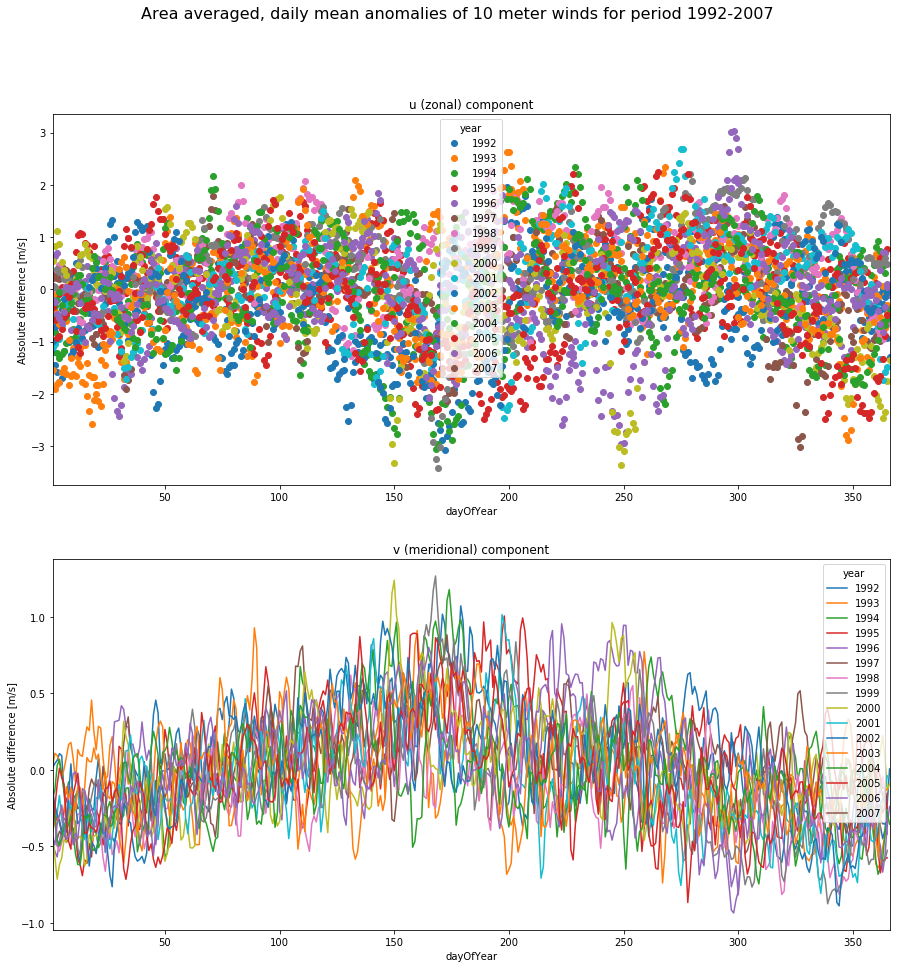

In [90]:
plt.clf()
fig,(ax1,ax2) = plt.subplots(2,figsize=(15,15))
plt.suptitle('Area averaged, daily mean anomalies of 10 meter winds for period 1992-2007',fontsize=16)
anom_df['u10'].plot(ax=ax1,linestyle='',marker='o')
ax1.set_title('u (zonal) component')
ax1.set_ylabel('Absolute difference [m/s]')
anom_df['v10'].plot(ax=ax2)
ax2.set_title('v (meridional) component')
ax2.set_ylabel('Absolute difference [m/s]')
plt.show()

Display statistics of each year

In [85]:
anom_df['u10'].describe()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,1.000000
mean,-0.279590,0.216802,-0.112853,-0.035412,-0.177679,-0.082691,0.522885,0.340182,-0.139661,0.178479,-0.324056,-0.148454,0.096327,-0.115565,0.062087,0.208166
std,0.938549,0.928720,1.050734,0.994633,0.952627,0.838282,0.738450,0.924489,1.005458,0.890331,0.870886,0.935399,0.878897,0.928633,0.906154,NaN
min,-3.069838,-2.578453,-3.056354,-2.473427,-2.956832,-3.024591,-1.267269,-3.423334,-3.353092,-2.459697,-2.549335,-2.884974,-1.838293,-2.489336,-2.590549,0.208166
25%,-0.883833,-0.278327,-0.793727,-0.635856,-0.794690,-0.577505,-0.051690,-0.181764,-0.738064,-0.323471,-0.983982,-0.805336,-0.492770,-0.723495,-0.516098,0.208166
50%,-0.191868,0.366450,0.052930,0.088536,-0.067870,-0.034951,0.583639,0.347481,-0.075862,0.290477,-0.265854,-0.219071,0.030004,-0.114286,0.016731,0.208166
75%,0.298841,0.864884,0.607709,0.638566,0.431860,0.431861,1.074920,0.985822,0.583540,0.797596,0.368809,0.489907,0.719410,0.605036,0.771382,0.208166
max,1.966715,2.620984,2.347192,2.246324,3.025873,1.789398,2.288490,2.217075,1.773379,2.692158,1.323321,2.084360,2.170192,2.205251,2.128333,0.208166


In [86]:
anom_df['v10'].describe()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,1.000000
mean,0.069712,-0.015890,0.056429,0.048505,0.073641,0.061095,-0.121052,-0.050336,-0.002345,-0.068338,0.044884,0.003311,-0.056576,-0.004005,-0.038164,-0.402282
std,0.333461,0.307090,0.371486,0.388452,0.337875,0.274950,0.304590,0.396405,0.338520,0.338905,0.376033,0.288763,0.260923,0.309766,0.351774,NaN
min,-0.608808,-0.740115,-0.683704,-0.692662,-0.936237,-0.547498,-0.815738,-0.876012,-0.715256,-0.809437,-0.889940,-0.610485,-0.746426,-0.867736,-0.818375,-0.402282
25%,-0.172287,-0.219664,-0.206771,-0.269749,-0.158285,-0.131737,-0.334256,-0.339213,-0.245152,-0.309581,-0.213182,-0.212845,-0.252349,-0.188574,-0.317832,-0.402282
50%,0.020779,-0.025477,-0.002239,0.005324,0.056218,0.046910,-0.135962,-0.054994,-0.040379,-0.110463,0.046917,-0.015434,-0.047866,-0.019575,-0.087100,-0.402282
75%,0.284950,0.179027,0.274140,0.320283,0.292724,0.221012,0.107938,0.205467,0.192433,0.131173,0.330136,0.208427,0.128341,0.201722,0.179501,-0.402282
max,1.072507,0.928660,1.178811,1.006211,0.945119,0.882503,0.627199,1.267525,1.239850,1.015237,0.971853,0.692631,0.694147,0.871246,0.955178,-0.402282
